# Question 2 : Medical Cost Personal Insurance Datasets
Problem Statement:
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

In [69]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
insurance = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
 insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [72]:
insurance.shape

(1338, 7)

In [73]:
type(insurance)

pandas.core.frame.DataFrame

In [74]:
insurance.sample()

,age,sex,bmi,children,smoker,region,charges
42,41,male,21.78,1,no,southeast,6272.4772


In [75]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [76]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [77]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [78]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [79]:
(insurance==0).sum()

age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64

In [80]:
#encoding smoker and region, sex column

In [81]:
le= LabelEncoder()
insurance['sex']= le.fit_transform(insurance['sex'])
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [82]:
le= LabelEncoder()
insurance['smoker']= le.fit_transform(insurance['smoker'])
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [83]:
le= LabelEncoder()
insurance['region']= le.fit_transform(insurance['region'])
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<AxesSubplot:xlabel='age', ylabel='charges'>

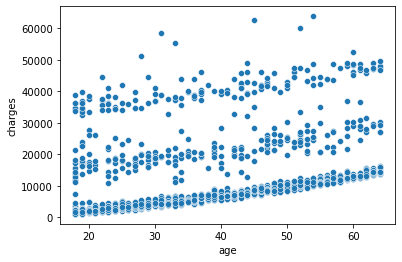

In [84]:
sns.scatterplot()
sns.scatterplot(x="age", y="charges", data= insurance)


In [85]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [86]:
#smoker is rightly skewed and region is left skewed. high std in age, bmi... outliers in bmi, charges

In [87]:
insurance.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
bmi         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
children    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
smoker      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
region      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
charges     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
dtype: object

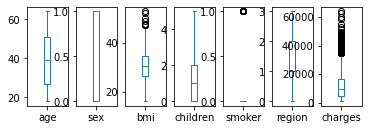

In [88]:
insurance.plot(kind="box",subplots=True,layout=(2,7))

<AxesSubplot:xlabel='sex', ylabel='charges'>

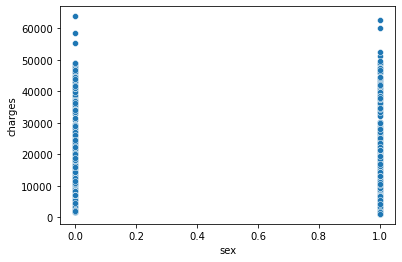

In [89]:
sns.scatterplot()
sns.scatterplot(x="sex", y="charges", data= insurance)


<AxesSubplot:xlabel='bmi', ylabel='charges'>

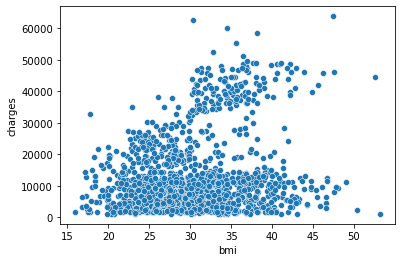

In [90]:
sns.scatterplot()
sns.scatterplot(x="bmi", y="charges", data= insurance)


<AxesSubplot:xlabel='children', ylabel='charges'>

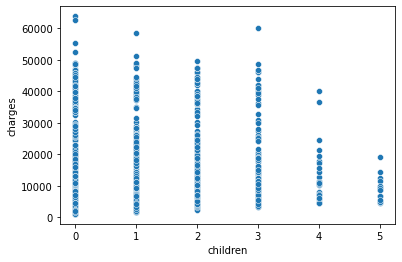

In [91]:
sns.scatterplot()
sns.scatterplot(x="children", y="charges", data= insurance)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

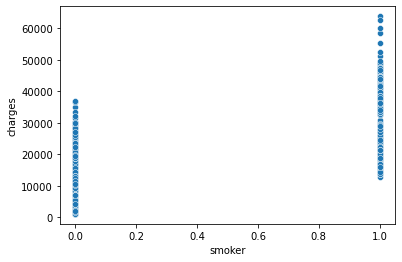

In [92]:
sns.scatterplot()
sns.scatterplot(x="smoker", y="charges", data= insurance)

<AxesSubplot:xlabel='region', ylabel='charges'>

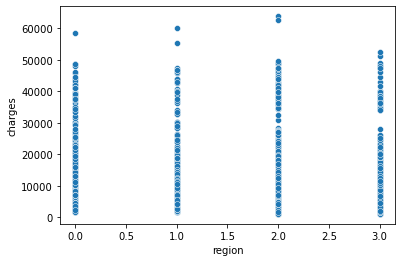

In [93]:
sns.scatterplot()
sns.scatterplot(x="region", y="charges", data= insurance)

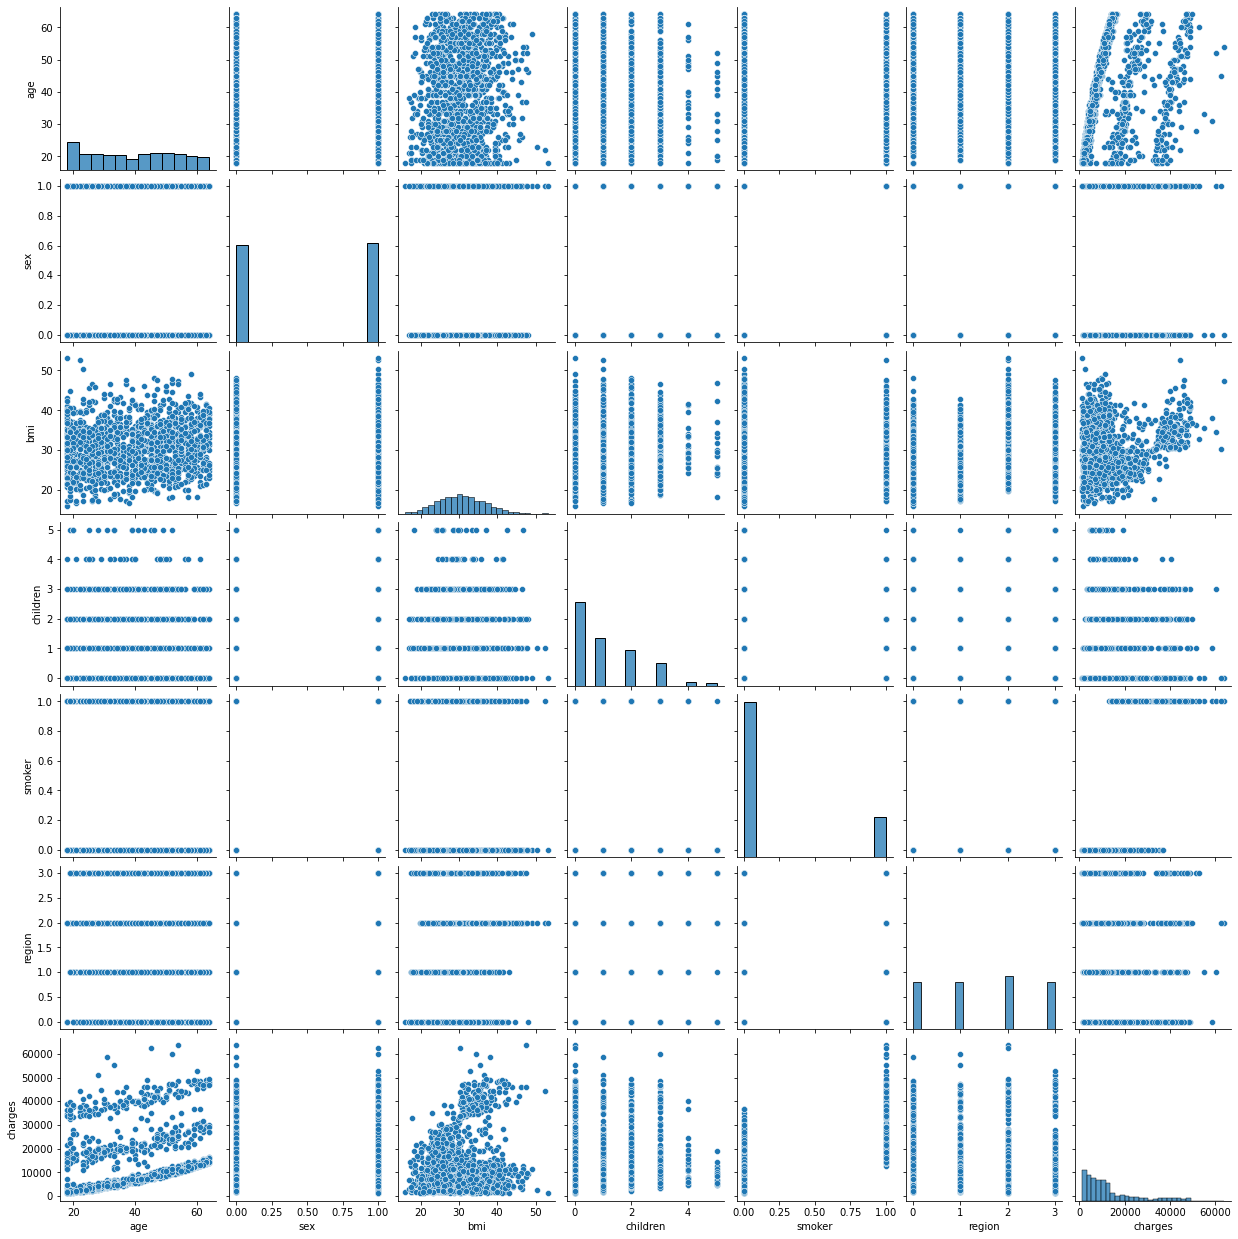

In [94]:
sns.pairplot(insurance)
plt.show()

In [95]:
#Zscore method to remove outliers

In [96]:
p= insurance.copy()

from scipy.stats import zscore
z=zscore(p)

df = p[(z <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(p.shape)

(1309, 7)
(1338, 7)


In [97]:
# Checking the dataloss in %

loss = (1599-1458)/1599*100
loss

8.818011257035648

In [98]:
#acceptable range of data loss

In [99]:
# reducing skewness


In [100]:
x = insurance.drop(columns = ['charges'])
y = insurance['charges']

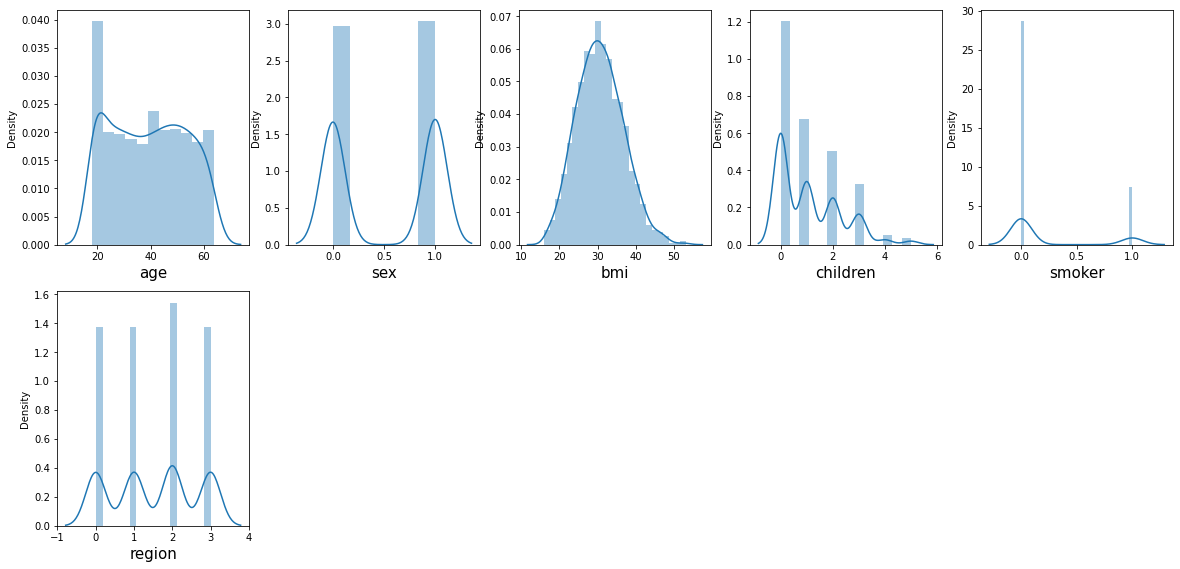

In [101]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

In [102]:
df.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [103]:
insurance = df.copy()
feat = ['age','charges', 'bmi']

skewdf = insurance[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

age       -0.376551
charges   -0.107363
bmi       -0.307333
dtype: float64

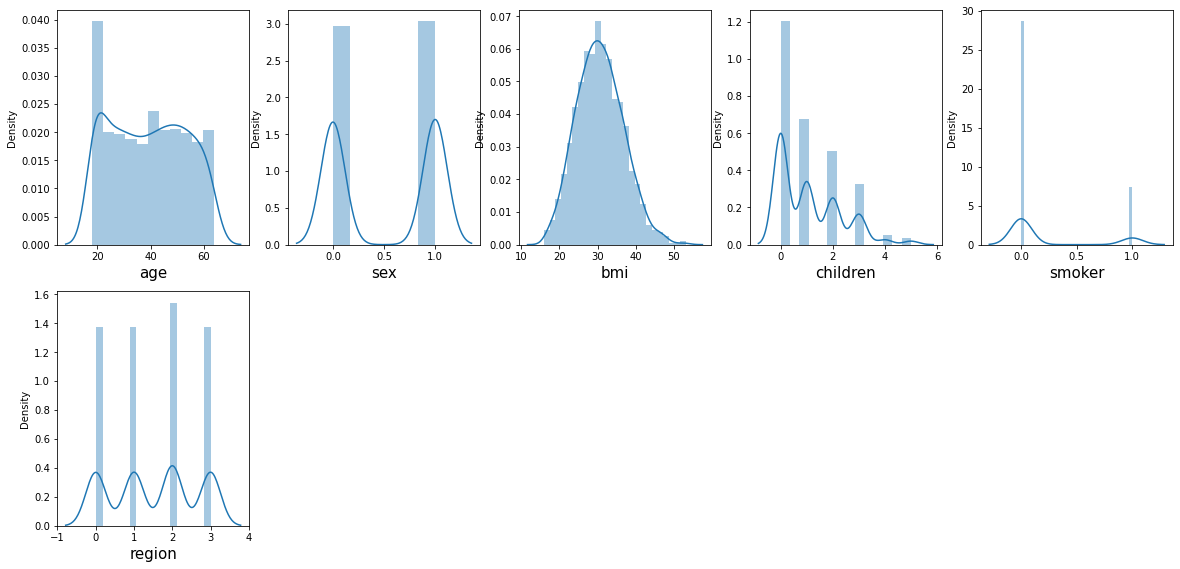

In [104]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score




x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state=i)
li = LinearRegression()
li.fit(x_train,y_train)
pred = li.predict(x_test)
print("error")
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

error
mean_squared_error: 36734630.60016943
mean_absolute_error: 4141.414836035963
0.7379352493761571


In [106]:
#finding insurance cost by providing random values

In [107]:
t=np.array([50,1,30.970,3,0,1])
t.shape

(6,)

In [108]:
t=t.reshape(1,-1)
t.shape

(1, 6)

In [109]:
li.predict(t)

array([11954.2447178])

In [110]:
#the end